# Data Loading

Google Drive Mounting 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import data image loading packages 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2
from PIL import Image,ImageStat
import math
import pandas as pd
from scipy import ndimage
import seaborn as sns

# Data Pre-Processing

Creating directory 

In [ ]:
DATADIR = "/content/drive/MyDrive/EDTS/KTP Classification /dataset_ktp"
CATEGORIES = ['fotocopy', 'real']

Luminance

In [ ]:
luminance_data = []

In [ ]:
def find_luminance():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = Image.open(os.path.join(path,img))
      stat = ImageStat.Stat(img_array)
      r,g,b = stat.rms
      lum = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))
      luminance_data.append([class_num, lum])

find_luminance()

In [ ]:
main_df = pd.DataFrame(luminance_data, columns = ['Photo Label', 'Luminance'])

R,G,B Mean 

In [ ]:
b_avg = []
g_avg = []
r_avg = []

In [ ]:
def find_rgb_avg():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and splits the RGB channels
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      # Get the average of the rows of B values in a picture
      b_mean_row = np.average(b_arr, axis=0)
      g_mean_row = np.average(g_arr, axis=0)
      r_mean_row = np.average(r_arr, axis=0)
      # Average again the total B values in a single picture (X and Y)
      b = np.average(b_mean_row, axis = 0)
      g = np.average(g_mean_row, axis = 0)
      r = np.average(r_mean_row, axis = 0)
      # Append values to the list 
      b_avg.append(b)
      g_avg.append(g)
      r_avg.append(r)
      
find_rgb_avg() 

In [ ]:
main_df['R Mean'] = r_avg
main_df['G Mean'] = g_avg
main_df['B Mean'] = b_avg

In [ ]:
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean
0,0,108.015872,94.084645,89.826063,89.760041
1,0,152.420934,147.113395,145.296944,143.911775
2,0,175.078256,185.539143,169.691959,156.873306
3,0,124.114468,114.699943,110.439527,109.353926
4,0,105.774837,100.529764,101.124736,100.981274


R,G,B Variance

In [ ]:
b_var = []
g_var = []
r_var = []

In [ ]:
def find_rgb_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      b_arr, g_arr, r_arr = cv2.split(img_array)
      # Finding variance using scipy package
      b  = ndimage.variance(b_arr)
      g = ndimage.variance(g_arr)
      r = ndimage.variance(r_arr)
      # Append values to list 
      b_var.append(b)
      g_var.append(g)
      r_var.append(r)
      
find_rgb_var()

In [ ]:
main_df['R Variance'] = r_var
main_df['G Variance'] = g_var
main_df['B Variance'] = b_var

Gray Variance

In [ ]:
var_gray = []

In [ ]:
def find_gray_var():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      laplacian = ndimage.laplace(img_array).var()
      var_gray.append(laplacian)

find_gray_var()

In [ ]:
main_df['Gray Variance'] = var_gray

Blur 

In [ ]:
blur_val = []

In [ ]:
def find_blur():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      blur = cv2.Laplacian(img_array, cv2.CV_64F).var()
      blur_val.append(blur)

find_blur()

In [ ]:
main_df['Blur'] = blur_val

Sharpness

In [ ]:
sharpness = []

In [ ]:
def find_sharpness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      L = img_HLS_array[:, :, 1]
      u = np.mean(L)
      LP = cv2.Laplacian(L, cv2.CV_64F).var()
      sharp = np.sum(LP / u)
      sharpness.append(sharp)

find_sharpness()

In [ ]:
main_df['Sharpness'] = sharpness

Distinct Pixel Rate 

In [ ]:
resolution = []

In [ ]:
def find_resolution():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      height, width = img_array.shape[:2]
      distinct_pix = height * width

      resolution.append(distinct_pix)

find_resolution()

In [ ]:
main_df['Resolution'] = resolution

Saturation

In [ ]:
saturation = []

In [ ]:
def find_saturation():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      img_HLS_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HLS)
      sat = img_HLS_array[:, :, 1].mean()
      
      saturation.append(sat)

find_saturation()

In [ ]:
main_df['Saturation'] = saturation

Colorfulness

In [ ]:
colorfulness = []

In [ ]:
def find_colorfulness():
  for category in CATEGORIES: 
    # Determine path and indexing class 
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    
    # For every image in path
    for img in os.listdir(path):
      # Reads image and then converts to HSV and take third channel
      img_array = cv2.imread(os.path.join(path,img))
      # split the image into its respective RGB components
      (B, G, R) = cv2.split(img_array.astype("float"))
      # compute rg = R - G
      rg = np.absolute(R - G)
      # compute yb = 0.5 * (R + G) - B
      yb = np.absolute(0.5 * (R + G) - B)
      # compute the mean and standard deviation of both `rg` and `yb`
      (rbMean, rbStd) = (np.mean(rg), np.std(rg))
      (ybMean, ybStd) = (np.mean(yb), np.std(yb))
      # combine the mean and standard deviations
      stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
      meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
      # derive the "colorfulness" metric and return it
      colorful = stdRoot + (0.3 * meanRoot)
      
      colorfulness.append(colorful)

find_colorfulness()

In [ ]:
main_df['Colorfulness'] = colorfulness

Printing the DataFrame Constructed

In [ ]:
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean,R Variance,G Variance,B Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,0,108.015872,94.084645,89.826063,89.760041,3140.660225,3457.591306,3891.504497,11394.115528,979.797994,10.668554,111040,92.011807,6.582818
1,0,152.420934,147.113395,145.296944,143.911775,1960.778592,2030.408707,2065.324670,7847.201504,3587.070781,24.669289,64800,145.665772,3.851335
2,0,175.078256,185.539143,169.691959,156.873306,772.147733,789.514703,819.591336,13014.157600,551.180912,3.229098,49000,171.468143,11.803814
3,0,124.114468,114.699943,110.439527,109.353926,2667.221786,3094.870946,3111.011797,13895.018146,196.655125,1.755649,70560,112.047222,6.311370
4,0,105.774837,100.529764,101.124736,100.981274,986.460310,996.568841,994.046831,12009.326236,1187.462301,11.775583,55806,100.832581,1.652960


# Model Building and Training

Import all the necessary packages

In [ ]:
# scaling data and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# packages for creating the layers of CNN 
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# package for learning the different metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle
from sklearn import preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shuffle dataset

In [ ]:
# Randomize the sequence of data
main_df = shuffle(main_df).reset_index(drop = True)
main_df.head()

,Photo Label,Luminance,R Mean,G Mean,B Mean,R Variance,G Variance,B Variance,Gray Variance,Blur,Sharpness,Resolution,Saturation,Colorfulness
0,1,153.272495,113.110771,151.538866,201.937483,1591.746068,1878.529799,1253.553320,15064.968154,72.384518,0.460513,128030,156.259306,69.703962
1,1,131.341993,109.416020,128.867360,139.108675,1368.381722,1630.719701,1720.435224,11643.163752,957.856866,7.699148,242724,124.501504,19.799284
2,0,119.183109,110.412764,106.682788,104.270633,2666.747855,2665.400210,2610.129923,13242.390610,317.974513,2.965231,124800,107.572260,3.764623
3,1,199.621119,176.679191,199.546877,219.567619,1572.987437,1527.282689,1412.218088,11629.398058,3698.608515,18.634622,25311,197.095532,33.657900
4,0,148.839143,144.932863,141.368524,141.399736,1908.715625,1923.009674,1931.605410,12298.442205,1057.951630,7.405984,45400,142.988921,3.916884


Normalize the Dataset and Split Data 

In [ ]:
# Define X and Y variables
X = main_df.drop(columns= ['Photo Label']).values # use all 13 variables
Y = main_df[['Photo Label']].values # 1 output: Classifying if it is real or fake. 0 = fotocopy, 1 = real 

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
# Normalize data using TF
normalizer = Normalizer()
X = normalizer.transform(X)

In [ ]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 50)

Building Model

In [ ]:
def build_and_compile_model(norm):
  ANN_model = tf.keras.Sequential([
      layers.Dense(13, input_dim = 13, activation ='relu'),
      layers.Dropout(0.1),
      layers.Dense(1, activation = 'sigmoid')
  ])

  ANN_model.compile(loss = 'binary_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(0.001),
                    metrics = ['accuracy'])
  
  return ANN_model

Fitting model and seeing loss 

In [ ]:
ANN_model = build_and_compile_model(normalizer)
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dropout (Dropout)           (None, 13)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = ANN_model.fit(
    X_train,
    Y_train,
    validation_split = 0.2,
    verbose = 0, epochs = 100)

In [ ]:
# Plotting the model 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Photo Label]')
  plt.legend()
  plt.grid(True)

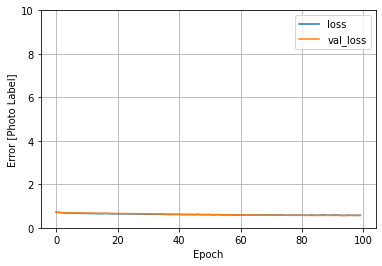

In [ ]:
plot_loss(history)

# Predicting

Predicting using Neural Network 

In [ ]:
Y_pred = ANN_model.predict(X_test)
Y_class = np.round(Y_pred).astype(int)
print(Y_class)

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]


In [ ]:
# Finding accuracy using classification report 
print(classification_report(Y_class, Y_test))

              precision    recall  f1-score   support

           0       0.33      0.44      0.38       156
           1       0.71      0.61      0.66       352

    accuracy                           0.56       508
   macro avg       0.52      0.52      0.52       508
weighted avg       0.59      0.56      0.57       508



# Hyperparameter Tuning 

Create new formula for model tuning 

In [ ]:
def model_tuner(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(13, input_dim = 13, activation = 'relu'))

  # Tune the number of layers and the units, with activation 
  # Choose an optimal value between 32-512
  for i in range(hp.Int('layers', 2, 3)):
    model.add(tf.keras.layers.Dense(units = hp.Int('units_' + str(i), 32, 512, step = 32),
                                    activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
  
  # Output layer 
  model.add(keras.layers.Dense(1, activation = 'sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), 
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

  return model

Tuning the hypermodel

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 


In [ ]:
# Create tuner 
tuner = kt.Hyperband(model_tuner,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 5,
                     overwrite = True)

tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
# Executing hyperparameter tuning
tuner.search(X_train, Y_train, epochs = 50, validation_split = 0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 5)[0]

Trial 13 Complete [00h 00m 03s]
val_accuracy: 0.5686274766921997

Best val_accuracy So Far: 0.7647058963775635
Total elapsed time: 00h 00m 39s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 3
units_0: 320
act_0: relu
units_1: 128
act_1: sigmoid
learning_rate: 0.01
units_2: 96
act_2: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7647058963775635
Trial summary
Hyperparameters:
layers: 3
units_0: 320
act_0: relu
units_1: 128
act_1: sigmoid
learning_rate: 0.01
units_2: 96
act_2: relu
tuner/epochs: 10
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0001
Score: 0.7647058963775635
Trial summary
Hyperparameters:
layers: 3
units_0: 64
act_0: relu
units_1: 352
act_1: relu
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
units_2: 32
act_2: relu
tuner/trial_id: 0000
Score: 0.6274510025978088
Trial summary
Hyperparameters:
layers: 3
units_0: 64
act_0: relu
units_1: 352
act_1: relu
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
uni

In [ ]:
ANN_model = tuner.hypermodel.build(best_hps)
history2 = ANN_model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 0.8065 - accuracy: 0.5246 - val_loss: 0.6751 - val_accuracy: 0.5686
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6172 - accuracy: 0.6281 - val_loss: 0.5559 - val_accuracy: 0.5686
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4929 - accuracy: 0.6749 - val_loss: 0.4488 - val_accuracy: 0.7647
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4750 - accuracy: 0.6823 - val_loss: 0.4438 - val_accuracy: 0.7647
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.6847 - val_loss: 0.4494 - val_accuracy: 0.7647
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.6872 - val_loss: 0.4474 - val_accuracy: 0.7647
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4735 - accuracy: 0.6872 - val_loss: 0.4529 - val_accuracy: 0.7647
Epoch 8/50
13/13 [=

In [ ]:
ANN_hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
ANN_hypermodel.fit(X_train, Y_train, epochs = 30, validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 2s 34ms/step - loss: 0.7345 - accuracy: 0.5764 - val_loss: 0.6973 - val_accuracy: 0.5686
Epoch 2/30
13/13 [==============================] - 0s 12ms/step - loss: 0.5896 - accuracy: 0.5764 - val_loss: 0.5504 - val_accuracy: 0.5686
Epoch 3/30
13/13 [==============================] - 0s 11ms/step - loss: 0.5053 - accuracy: 0.6379 - val_loss: 0.4446 - val_accuracy: 0.7647
Epoch 4/30
13/13 [==============================] - 0s 10ms/step - loss: 0.4884 - accuracy: 0.6626 - val_loss: 0.4404 - val_accuracy: 0.7647
Epoch 5/30
13/13 [==============================] - 0s 10ms/step - loss: 0.4770 - accuracy: 0.6601 - val_loss: 0.4359 - val_accuracy: 0.7647
Epoch 6/30
13/13 [==============================] - 0s 11ms/step - loss: 0.4738 - accuracy: 0.6700 - val_loss: 0.4510 - val_accuracy: 0.7745
Epoch 7/30
13/13 [==============================] - 0s 10ms/step - loss: 0.4599 - accuracy: 0.7192 - val_loss: 0.4294 - val_accuracy: 0.7451
Epoch 8/30
13

In [ ]:
eval_result = ANN_hypermodel.evaluate(X_test, Y_test)
print("[test loss, test accuracy]:", eval_result)

16/16 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.7776
[test loss, test accuracy]: [0.41213563084602356, 0.7775590419769287]


In [ ]:
ANN_result = []
ANN_prediction = ANN_hypermodel.predict(X_test)
ANN_class = np.round(ANN_prediction).astype(int)
for x in ANN_class:
  ANN_result.append(x)

In [ ]:
print(classification_report(ANN_result, Y_test))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       258
           1       0.73      0.88      0.80       250

    accuracy                           0.78       508
   macro avg       0.79      0.78      0.78       508
weighted avg       0.79      0.78      0.78       508



In [ ]:
ANN_clf = KerasClassifier(build_fn=ANN_hypermodel, epochs=6, batch_size=64, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ANN_clf, X_test, Y_test, cv=10, scoring='accuracy'))

[nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 153, in fit
    **self.filter_sk_params(self.build_fn.__call__))
  File "/us

# Saving to JSON file

In [ ]:
ANN_model_json = ANN_hypermodel.to_json()
with open("ANN_model.json", "w") as json_file:
    json_file.write(ANN_model_json)

# serialize weights to HDF5
ANN_model.save_weights("ANN_model.h5")
print("Saved model to disk")

Saved model to disk
